# Análisis Exploratorio de Datos - EDA

## Limpieza e imputación de datos

In [32]:
import datetime as dt
import pandas as pd
import pathlib
import os
import time
import seaborn as sns
import matplotlib.pyplot as plt
# os.chdir(pathlib.Path.cwd())

#Conexión de google drive con el repo
from google.colab import drive
drive.mount('/content/drive')

###==========================
ruta = os.path.join("/content/drive/MyDrive","MonografiaUdeA")
os.chdir(ruta)
abspath = pathlib.Path.cwd()
print(f"Directorio de trabajo: {abspath}")
###==========================

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Directorio de trabajo: /content/drive/MyDrive/MonografiaUdeA


In [33]:
df = pd.read_csv(os.path.join(abspath,"datasets", "procesado", "1_dataset_unificado.csv"))
df1 = df.copy()
df.head(3)

,fecha,precio_bolsa,demanda,disp_dec_hidraulica,disp_dec_no_termica,disp_dec_termica,disponibilidad_declarada,gen_hidraulica,gen_no_termica,gen_termica,generacion,aportes_energia,precio_oferta,vol_util,indice_ONI,vertimientos
0,2010-01-01,120.501228,1.133616e+08,356125.000000,102616.666667,121611.607143,213690.151515,35796804.67,13362226.83,66260052.96,1.154191e+08,45616100.0,267.437633,1.000661e+10,1.5,NaN
1,2010-01-02,118.495340,1.254718e+08,353776.515152,102616.666667,121633.928571,212762.121212,46595646.99,13393741.63,67691806.16,1.276812e+08,43097100.0,277.153592,9.995147e+09,1.5,NaN
2,2010-01-03,121.160145,1.211452e+08,356579.545455,102616.666667,119455.357143,212774.242424,42578875.20,13046074.83,68012828.41,1.236378e+08,43400400.0,313.552755,9.992677e+09,1.5,NaN


In [34]:
# !pip install -r requirements.txt

In [35]:
# !pip install "pydantic==1.*" ydata-profiling pandas-profiling

In [36]:
# pip install jupyter-summarytools

In [37]:
df = df.set_index('fecha')
df.index = pd.to_datetime(df.index)
df.describe()

,precio_bolsa,demanda,disp_dec_hidraulica,disp_dec_no_termica,disp_dec_termica,disponibilidad_declarada,gen_hidraulica,gen_no_termica,gen_termica,generacion,aportes_energia,precio_oferta,vol_util,indice_ONI,vertimientos
count,3652.000000,3.652000e+03,3652.000000,3652.000000,3652.000000,3652.000000,3.652000e+03,3.652000e+03,3.652000e+03,3.652000e+03,3.652000e+03,3652.000000,3.652000e+03,3652.000000,1.982000e+03
mean,185.084195,1.734175e+08,309486.664271,71813.588114,114963.904889,190743.105544,1.324631e+08,3.959264e+06,3.889035e+07,1.753127e+08,1.555487e+08,301.260578,1.052571e+10,0.036802,1.202052e+07
std,170.130915,1.719464e+07,71946.292966,42172.204007,12606.324139,34869.660776,2.305263e+07,2.160212e+06,1.716655e+07,1.670075e+07,7.514331e+07,72.950289,2.165622e+09,0.882722,1.730633e+07
min,35.356673,1.133616e+08,186919.501263,0.000000,79440.486111,124933.402968,3.579680e+07,1.328458e+06,1.197768e+07,1.154191e+08,2.903210e+07,188.077521,5.776673e+09,-1.600000,4.387172e+01
25%,95.595586,1.611664e+08,240872.451779,34109.535256,106695.684524,156938.100692,1.191720e+08,2.960760e+06,2.476474e+07,1.636234e+08,1.019486e+08,245.612168,8.861809e+09,-0.525000,1.493444e+06
50%,146.233215,1.749549e+08,313416.666667,66109.000000,114439.660304,197596.212121,1.339038e+08,3.451657e+06,3.564647e+07,1.771236e+08,1.438747e+08,290.597951,1.074591e+10,0.000000,4.515565e+06
75%,194.490720,1.866113e+08,375712.500000,104666.666667,123360.488506,221791.832000,1.463502e+08,4.091160e+06,4.994093e+07,1.886174e+08,1.920314e+08,336.849947,1.236404e+10,0.500000,1.537456e+07
max,1942.692797,2.137784e+08,445450.000000,157000.000000,148258.928571,260369.897959,1.805965e+08,1.725661e+07,9.357261e+07,2.151544e+08,5.912453e+08,736.062549,1.450158e+10,2.600000,1.367190e+08


In [38]:
df.isnull().sum()

precio_bolsa                   0
demanda                        0
disp_dec_hidraulica            0
disp_dec_no_termica            0
disp_dec_termica               0
disponibilidad_declarada       0
gen_hidraulica                 0
gen_no_termica                 0
gen_termica                    0
generacion                     0
aportes_energia                0
precio_oferta                  0
vol_util                       0
indice_ONI                     0
vertimientos                1670
dtype: int64

Imputación de nulos, indican que no hubo vertimientos en el sistema

In [39]:
df['vertimientos'] = df['vertimientos'].fillna(0)
df.isnull().sum()

precio_bolsa                0
demanda                     0
disp_dec_hidraulica         0
disp_dec_no_termica         0
disp_dec_termica            0
disponibilidad_declarada    0
gen_hidraulica              0
gen_no_termica              0
gen_termica                 0
generacion                  0
aportes_energia             0
precio_oferta               0
vol_util                    0
indice_ONI                  0
vertimientos                0
dtype: int64

In [40]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df.reset_index(), tsmode=True)
# profile.to_file('profile_report.html')

In [41]:
df.to_csv(os.path.join(abspath,"datasets", "procesado","2_dataset_procesado.csv"), index=False)

## Análisis univariado

### Visualización de la serie

<ipython-input-42-d5587ffd0171>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


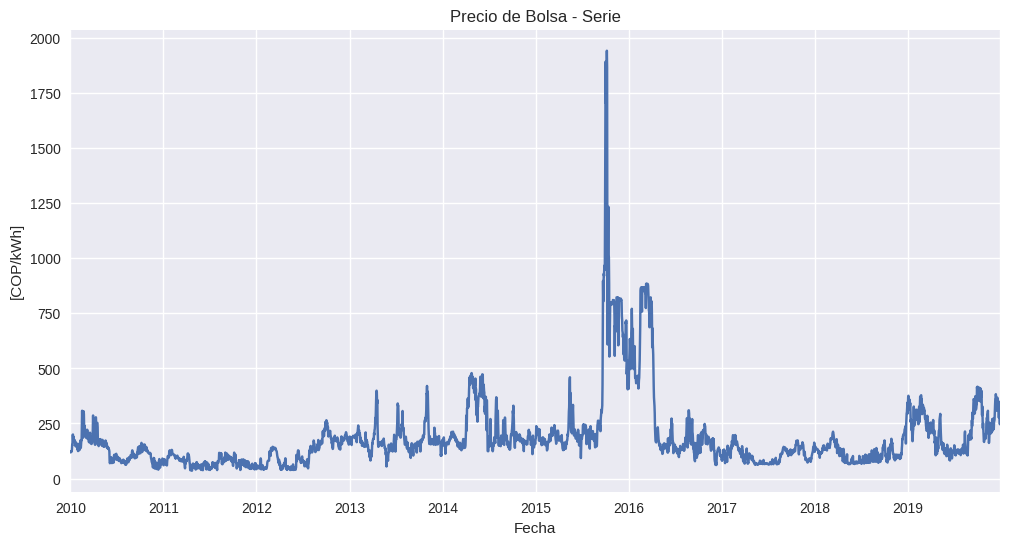

In [42]:
plt.style.use("seaborn")
plt.figure(figsize=(12,6))
df['precio_bolsa'].plot(title='Precio de Bolsa - Serie')
plt.ylabel('[COP/kWh]')
plt.xlabel('Fecha')
plt.show();

Es posible observar cierta estacionalidad, exceptuando el periodo 2015-2016 impactado por el fenómeno del niño, que causó, debido al déficit hídrico un alza en el precio de la energía fuera de la tendencia

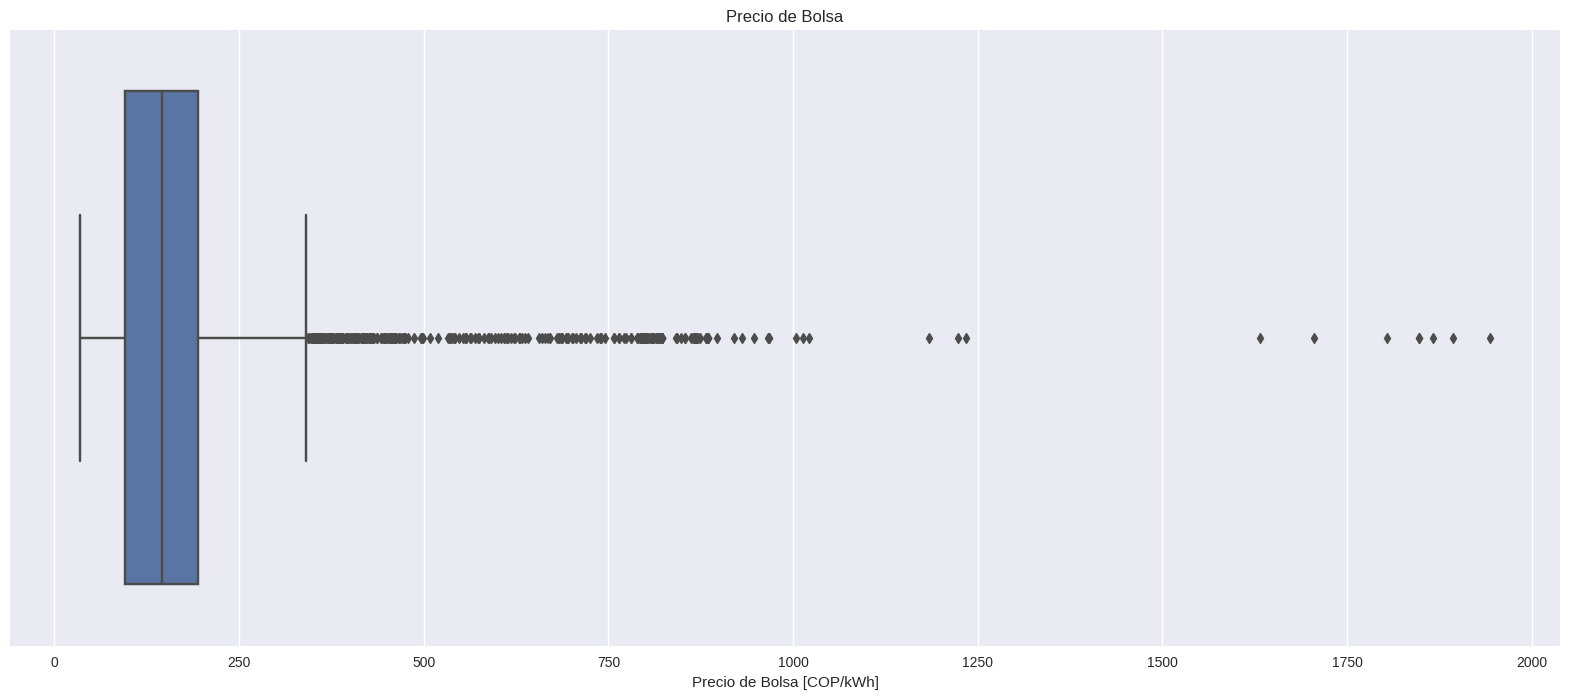

In [43]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df, x='precio_bolsa')
plt.xlabel('Precio de Bolsa [COP/kWh]')
plt.title(f'Precio de Bolsa');

### Autocorrelación de la serie

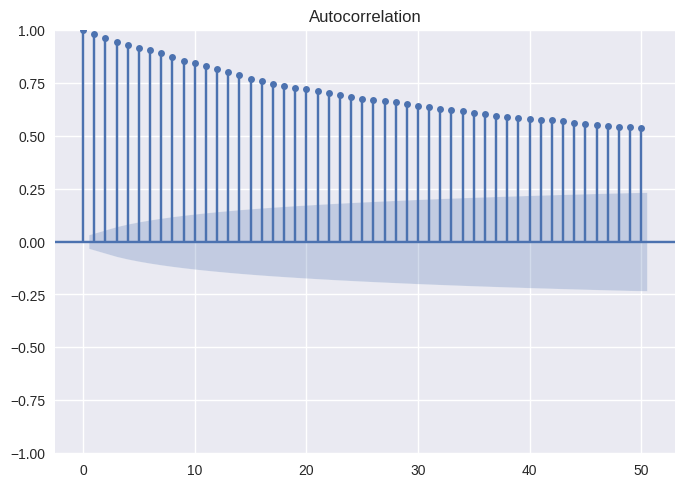

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
series = df.precio_bolsa
plot_acf(series, lags = 50)
plt.show()

Es posible observar que la serie está autocorrelacionada

### Autocorrelación parcial

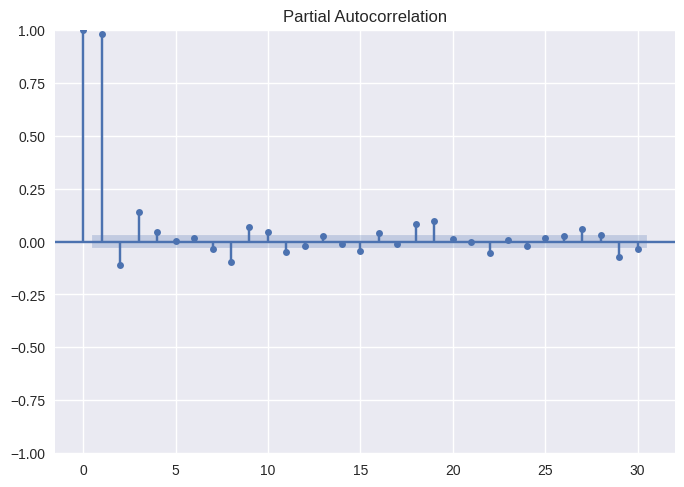

In [45]:
plot_pacf(series, lags = 30)
plt.show()

El valor de análisis tiene una alta correlación con el valor anterior

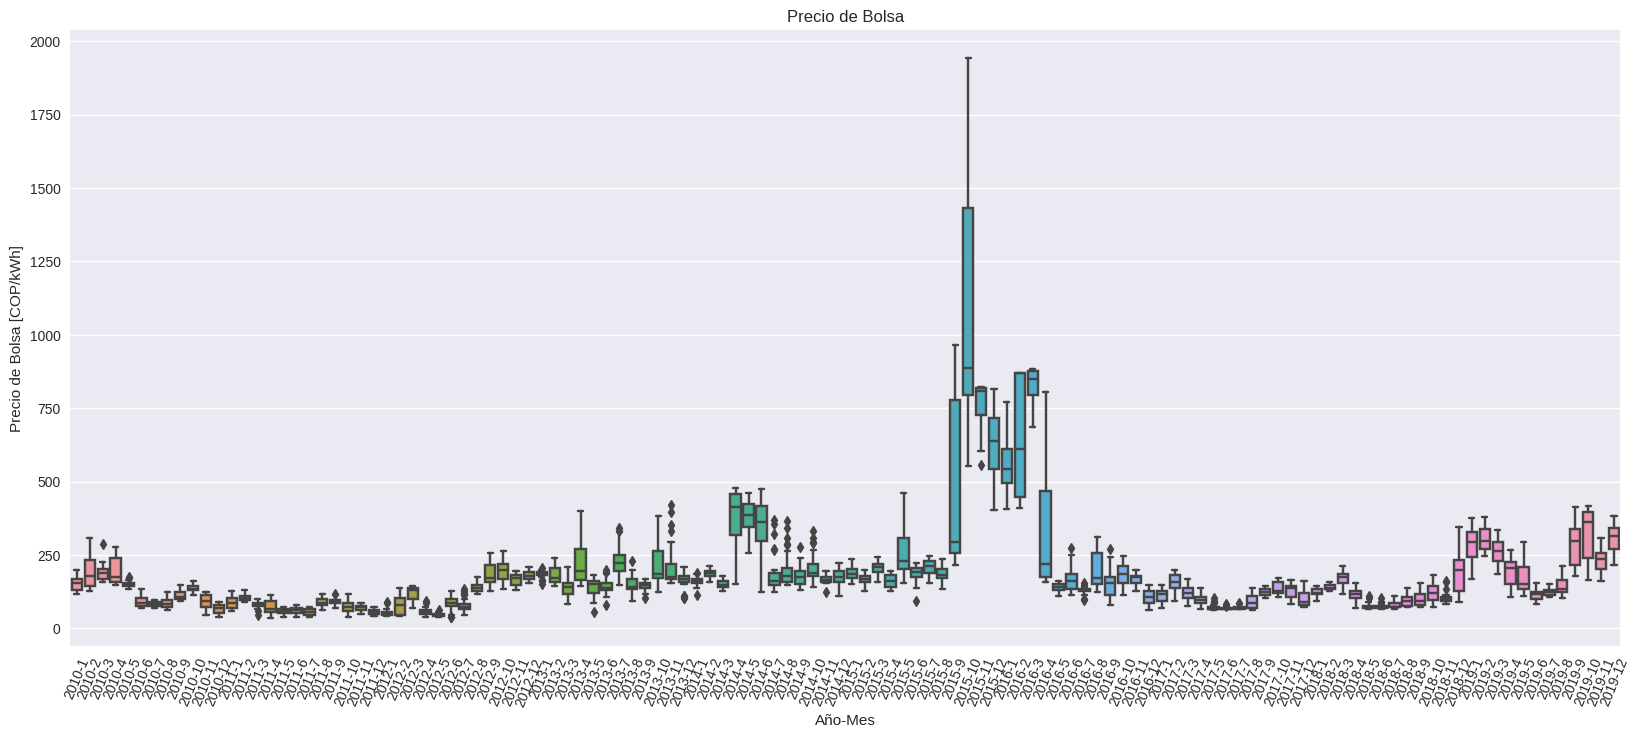

In [46]:
df['year'] = [x for x in df.index.year]
df['month'] = [x for x in df.index.month]
df['year_month'] = [str(x.year) + '-' + str(x.month) for x in df.index]

df_plot = df[df['year'] >= 2010].reset_index().sort_values(by='fecha').set_index('fecha')
plt.figure(figsize=(20,8))
plt.xticks(rotation=90*(3/4))

sns.boxplot(x='year_month', y='precio_bolsa', data=df_plot)
plt.xlabel('Año-Mes')
plt.ylabel('Precio de Bolsa [COP/kWh]')
plt.title(f'Precio de Bolsa');

Es posible observar que en Verano (Los meses: dic., ene., feb., mar., abr.) los precios tienden a ser más volátiles y con una tendencia al alza.

In [47]:
df = df1.copy()
df = df.set_index('fecha')

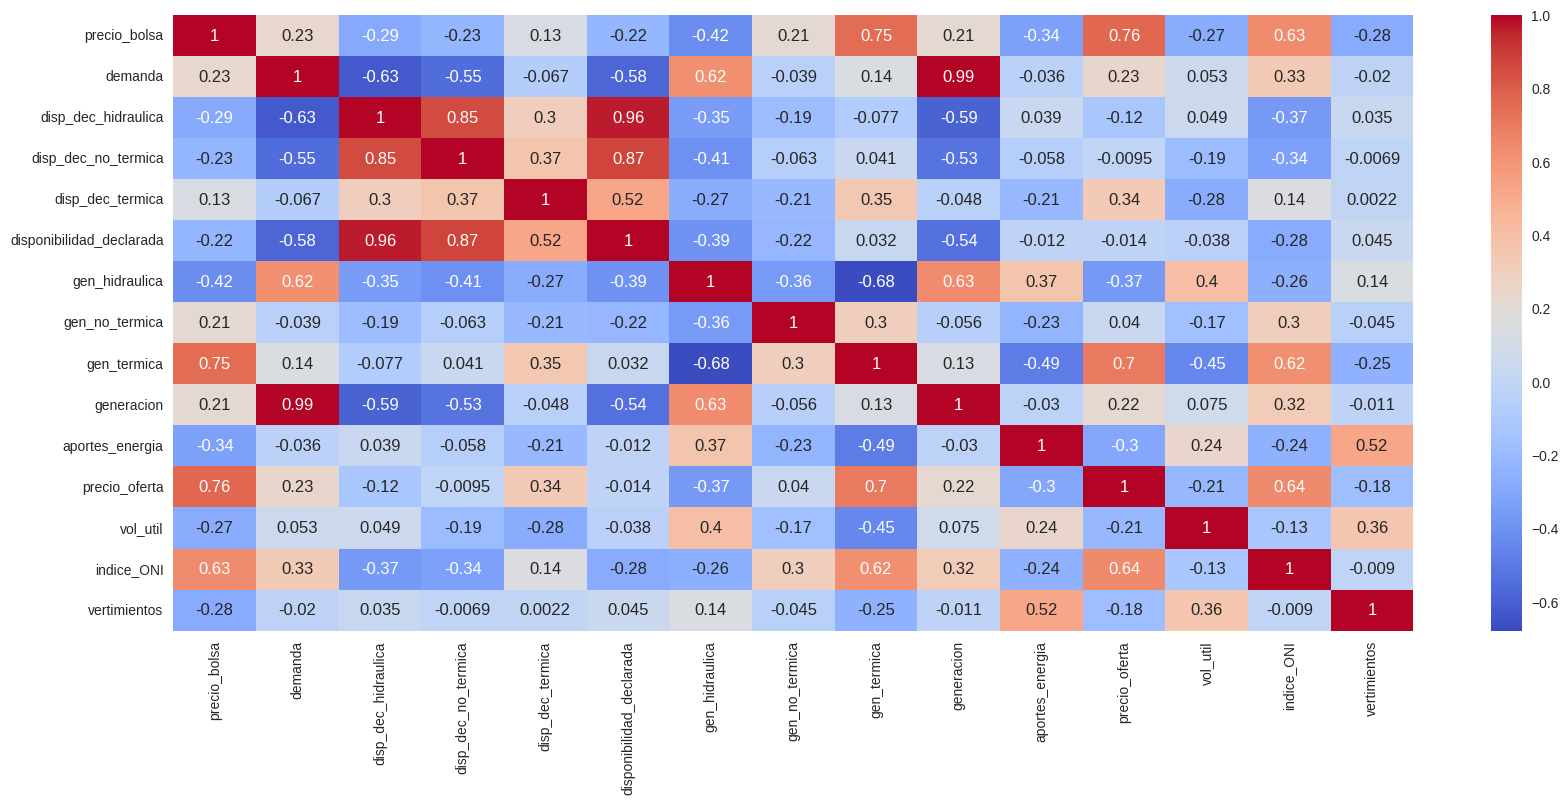

In [48]:
# Heatmap of correlation matrix
plt.figure(figsize = (20,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Filtrado variables

In [49]:
variable_interes = "precio_bolsa"
correlation_with_interest = df.corr()[variable_interes].abs()

variables_a_incluir = correlation_with_interest[correlation_with_interest >= 0.25].index
print(variables_a_incluir)
variables_a_incluir = variables_a_incluir.drop(variable_interes)
print(variables_a_incluir)
df_filtrado = df[variables_a_incluir]
df_filtrado.info()

Index(['precio_bolsa', 'disp_dec_hidraulica', 'gen_hidraulica', 'gen_termica',
       'aportes_energia', 'precio_oferta', 'vol_util', 'indice_ONI',
       'vertimientos'],
      dtype='object')
Index(['disp_dec_hidraulica', 'gen_hidraulica', 'gen_termica',
       'aportes_energia', 'precio_oferta', 'vol_util', 'indice_ONI',
       'vertimientos'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 3652 entries, 2010-01-01 to 2019-12-31
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   disp_dec_hidraulica  3652 non-null   float64
 1   gen_hidraulica       3652 non-null   float64
 2   gen_termica          3652 non-null   float64
 3   aportes_energia      3652 non-null   float64
 4   precio_oferta        3652 non-null   float64
 5   vol_util             3652 non-null   float64
 6   indice_ONI           3652 non-null   float64
 7   vertimientos         1982 non-null   float64
dtypes: floa

In [50]:
# Configurar el estilo y los parámetros
sns.set(style="ticks", palette="muted")
# Graficar diagramas de dispersión de cada métrica
sns.pairplot(df.dropna(), diag_kind='kde', height=2)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

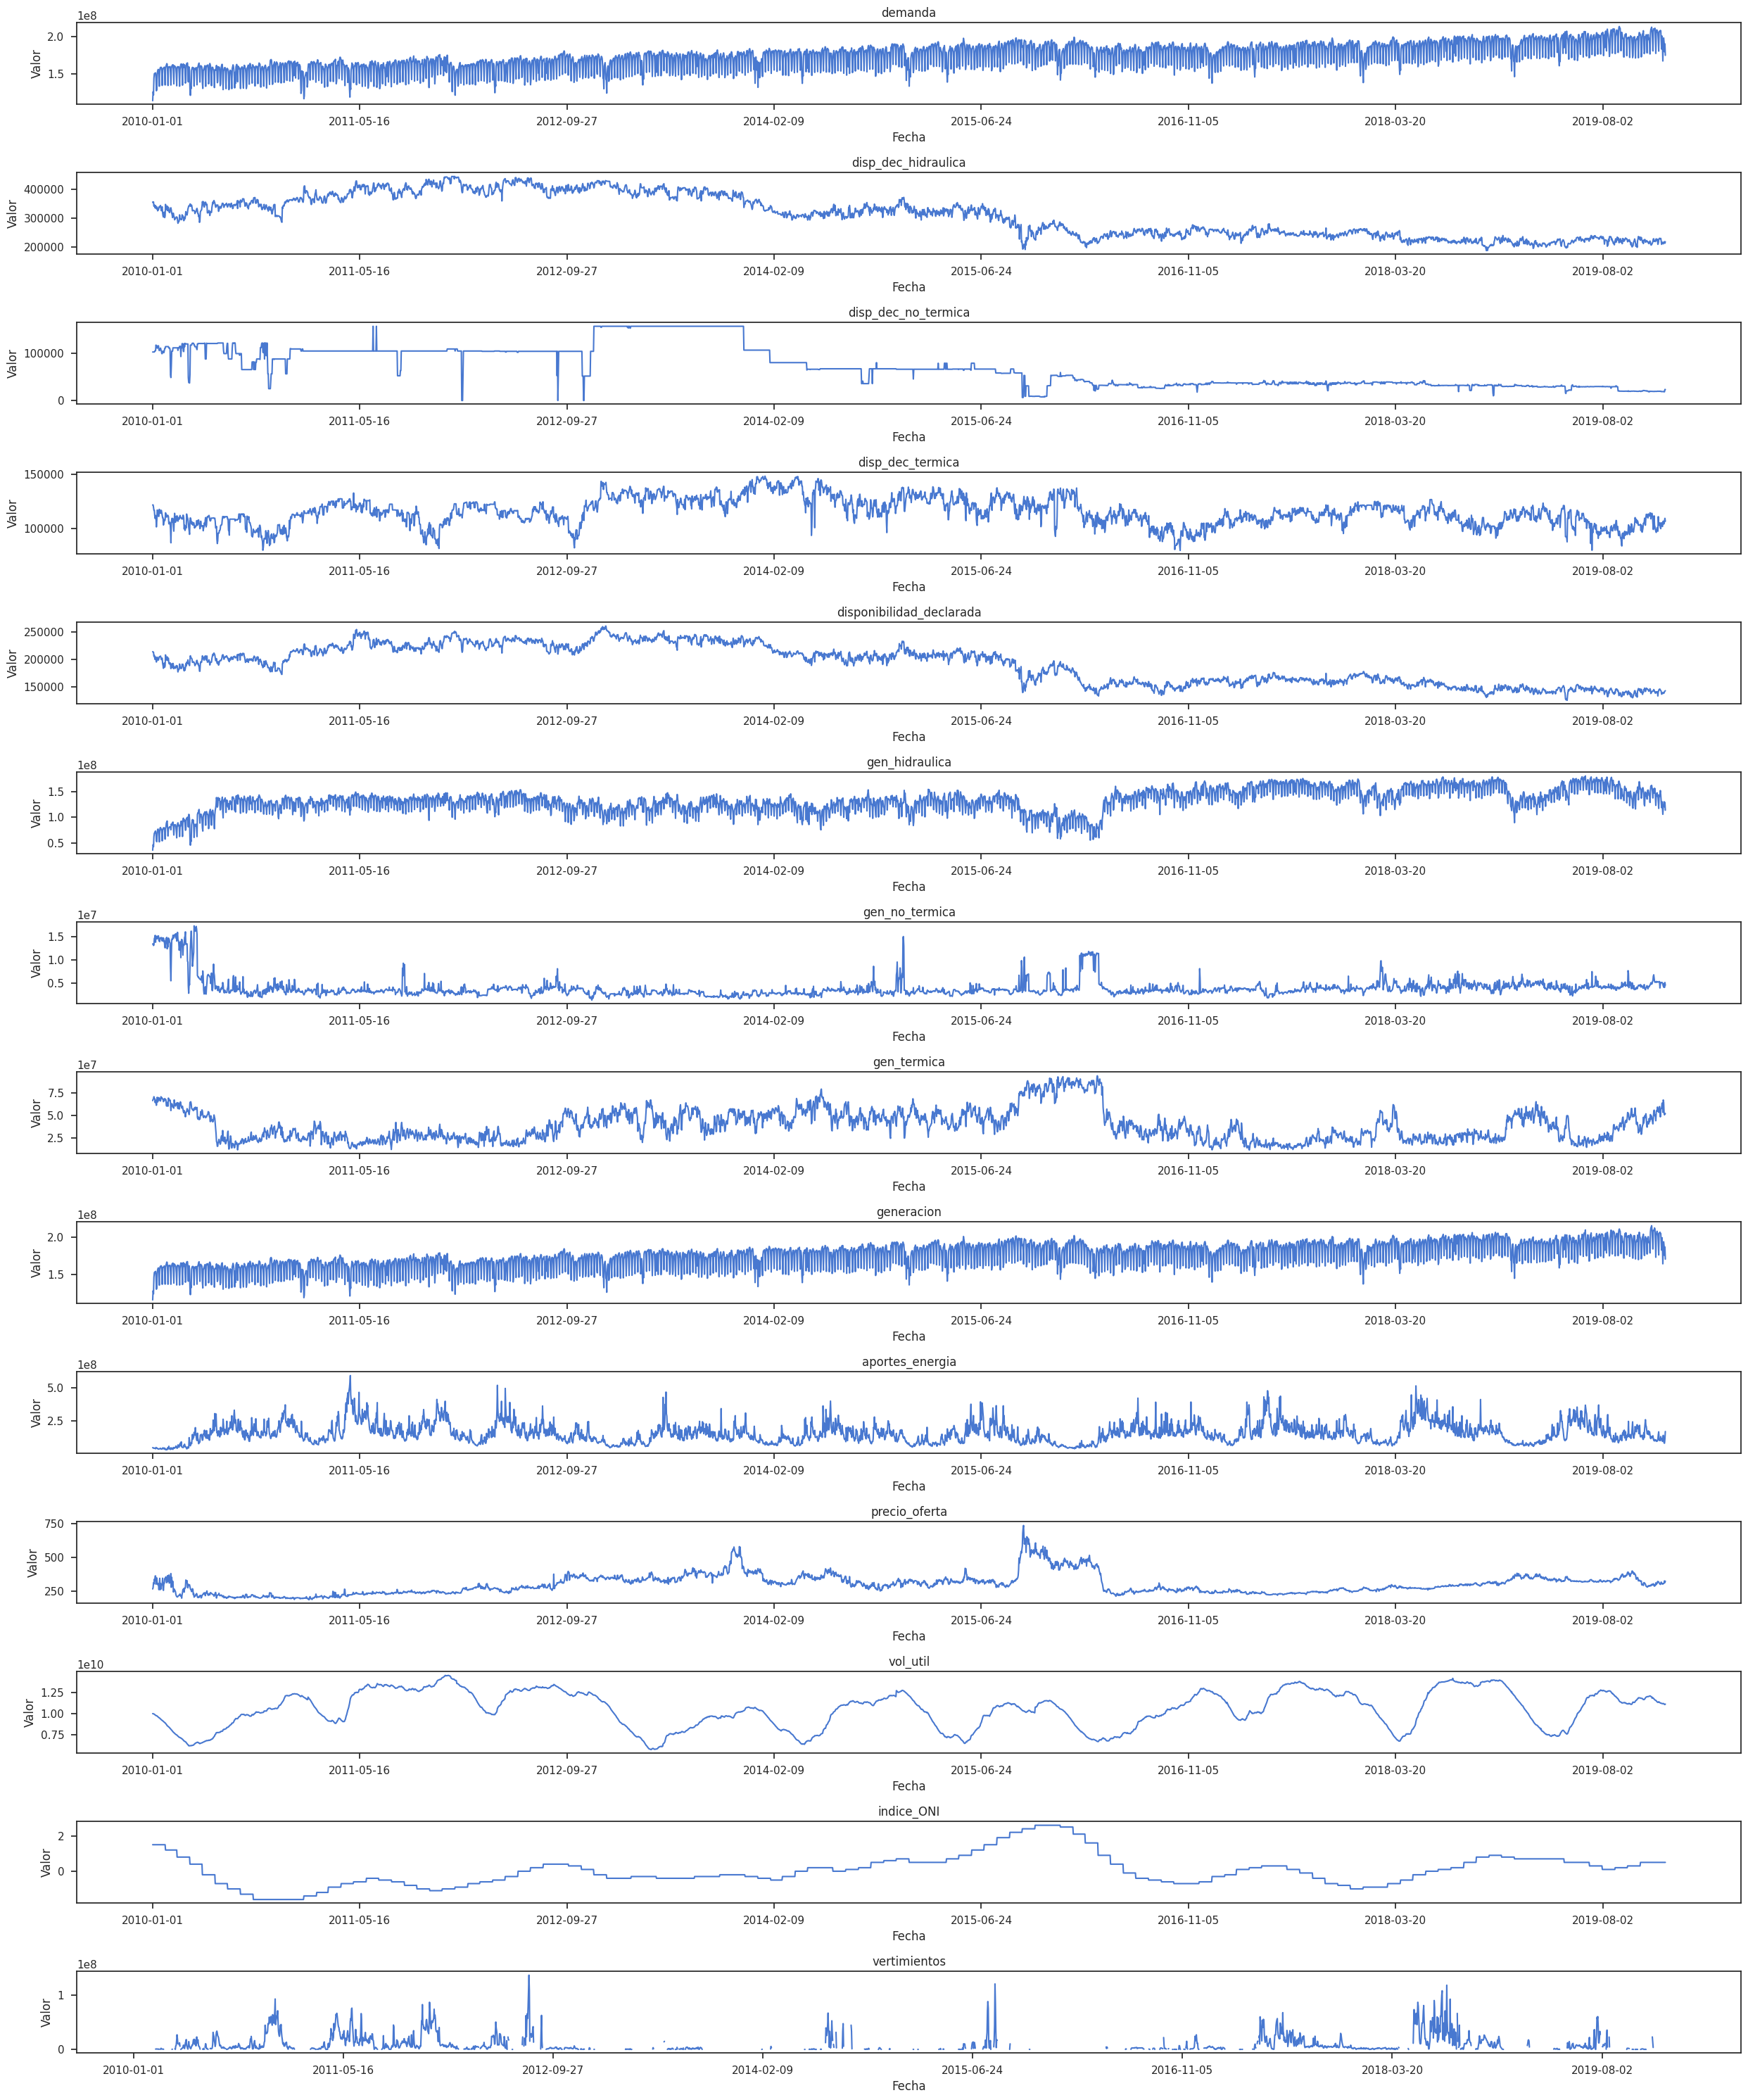

In [51]:
# Configurar las filas y columnas para los subplots
num_rows = len(df.columns) - 1 # // 1 + 1  # Calcular el número de filas necesario para los subgráficos
num_cols = 1  # Puedes cambiar este número si deseas mostrar más columnas

# Crear los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 30))
plt.subplots_adjust(top=0.9)  # Adjust the value as per your requirement

# Iterar sobre cada columna y crear un subplot
for i, columna in enumerate(df[[column for column in df.columns if "precio_bolsa" not in column.lower()]].columns):
    row = i# // num_cols
    col = i# % num_cols
    ax = axes[row]#, col]
    df[columna].plot(ax=ax)
    ax.set_title(columna)
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Valor')


# Ajustar el diseño y mostrar los subplots
plt.tight_layout()
plt.show()